In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time


# New dataframe with paths to every raw audio file

In [2]:
fma_small = pd.read_csv("fma_small.csv")
fma_small_training = fma_small[fma_small["Set"] == "training"]
rawAudio_training = fma_small_training[["Song ID","Genre"]]

fma_small_test = fma_small[fma_small["Set"] == "test"]
rawAudio_test = fma_small_test[["Song ID","Genre"]]

rawAudio_training

,Song ID,Genre
0,2,Hip-Hop
1,5,Hip-Hop
2,10,Pop
3,140,Folk
4,141,Folk
...,...,...
7893,153955,Pop
7894,153956,Pop
7901,154413,Pop
7902,154414,Pop


Argumentations:
 - Half tone pitch shifting
 - One tone pitch shifting
 - Noise injection
 - Each combination (Tone pitch either or)

In [3]:
def pitch_shift_(AUDIO_FILE, pitch_factor): # 1 semitone = 0.5 tone, 2 semitones = 1 tone shift
    data, sr = librosa.load(AUDIO_FILE)
    #print(data)
    return librosa.effects.pitch_shift(data, sr=sr, n_steps = pitch_factor)


def add_noise(AUDIO_FILE, noise_factor): # 0.005
    data, sr = librosa.load(AUDIO_FILE)
    
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    augmented_data = augmented_data.astype(type(data[0])) # Cast back to same data type
    return augmented_data
    
    
# https://towardsdatascience.com/data-augmentation-techniques-for-audio-data-in-python-15505483c63c#f531
def change_speed(AUDIO_FILE, rate): # 0.9
    data, sr = librosa.load(AUDIO_FILE)
    augmented_audio = librosa.effects.time_stretch(data, rate = rate)
    return augmented_audio


def combined_argmentations(AUDIO_FILE): # 0.005 and 1
    noise_factor = 0.005
    pitch_factor = 1
    
    data, sr = librosa.load(AUDIO_FILE)
    data2 = librosa.effects.pitch_shift(data, sr=sr, n_steps = pitch_factor)
    
    noise = np.random.randn(len(data2))
    augmented_data = data2 + noise_factor * noise
    augmented_data = augmented_data.astype(type(data2[0])) # Cast back to same data type
    return augmented_data


# Aug1 = Pitch shift: +1
# Aug2 = Add noise: 0.005
# Aug3 = Change Speed: 

In [4]:
#change_speed("Data/fma_small/000/000002.mp3", 0.9)


In [5]:
def MP3ToSpectrogram(AUDIO_FILE, file_Name, Genre): # Took the function from previous calculations of spectrograms
    signal, sr = librosa.load(AUDIO_FILE)

    # this is the number of samples in a window per fft
    n_fft = 2048

    # The amount of samples we are shifting after each fft
    hop_length = 512
    
    ### CHANGE AUGMENTATION SCHEME HERE ###
    #signal = pitch_shift_(path, 1)
    signal = pitch_shift_(path, -1)
    
    mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    librosa.display.specshow(power_to_db, sr=sr, cmap="magma", hop_length=hop_length) # x_axis="time", y_axis="mel"
    plt.savefig("SpectrogramData_Formatted/training_Pitch-1/"+Genre+"/"+file_Name+".png", bbox_inches="tight")



7060 of 7115
99.23%
Time since start: 8.87 seconds

7070 of 7115
99.37%
Time since start: 20.89 seconds

7080 of 7115
99.51%
Time since start: 32.30 seconds

7090 of 7115
99.65%
Time since start: 43.91 seconds

7100 of 7115
99.79%
Time since start: 55.17 seconds

7110 of 7115
99.93%
Time since start: 66.71 seconds



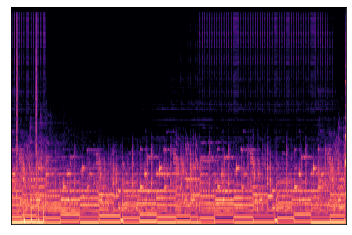

In [19]:
maxLength = len(rawAudio_training)
start_time = time.time()
count = 0

for index, row in rawAudio_training.iterrows():
    count += 1
    
    filepath = "SpectrogramData_Formatted/training_Pitch-1/"+row[1]+"/"+str(row[0])+"_Pitch-1"+".png"
    if not os.path.exists(filepath): # If path does not exist
        zerosToAdd = abs((len(str(row[0])) - 6)) # -6 since the max amount of numbers in the iD
    #    print("zerosToAdd", zerosToAdd)
        for i in range(zerosToAdd):
            row[0] = "0"+str(row[0])
        
        folder = str(row[0])[0:3]        
        path = "Data/fma_small"+"/"+folder+"/"+str(row[0])+".mp3"
        MP3ToSpectrogram(path, str(int(row[0]))+"_Pitch-1", row[1])
    else:
        continue
    if count%10 == 0:
        print(str(count)+" of "+str(maxLength))
        print(str(round(count/maxLength*100, 2))+"%")
        time_since_start = time.time() - start_time
        print(f"Time since start: {time_since_start:.2f} seconds")
        start_time = time.time()
        print()


In [55]:
from PIL import Image
import os

def is_image_corrupted(image_path):
    try:
        Image.open(image_path).verify()
        return False  # Image is not corrupted
    except (IOError, SyntaxError):
        return True   # Image is corrupted

def find_corrupted_images(directory):
    corrupted_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            image_path = os.path.join(root, file)
            if is_image_corrupted(image_path):
                corrupted_images.append(image_path)
    return corrupted_images

# Main directory containing images
main_directory = "SpectrogramData_Formatted/training_Aug1"

corrupted_images_list = find_corrupted_images(main_directory)

print("Corrupted images:")
for image_path in corrupted_images_list:
    print(image_path)


Corrupted images:
SpectrogramData_Formatted/training_Aug1\Electronic\67640_aug1.png
SpectrogramData_Formatted/training_Aug1\Experimental\146343_aug1.png


In [56]:
from PIL import Image
import os

def is_image_corrupted(image_path):
    try:
        Image.open(image_path).verify()
        return False  # Image is not corrupted
    except (IOError, SyntaxError):
        return True   # Image is corrupted

def find_corrupted_images(directory):
    corrupted_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            image_path = os.path.join(root, file)
            if is_image_corrupted(image_path):
                corrupted_images.append(image_path)
    return corrupted_images

# Main directory containing images
main_directory = "SpectrogramData_Formatted/training_Aug2"

corrupted_images_list = find_corrupted_images(main_directory)

print("Corrupted images:")
for image_path in corrupted_images_list:
    print(image_path)


Corrupted images:
SpectrogramData_Formatted/training_Aug2\Electronic\31042_aug2.png
SpectrogramData_Formatted/training_Aug2\Folk\144472_aug2.png
